# Question 1

## (i)

[0.9918 1.0072 1.0005 1.0021 1.0007 1.0029 0.9817 1.008  0.99   1.0151]


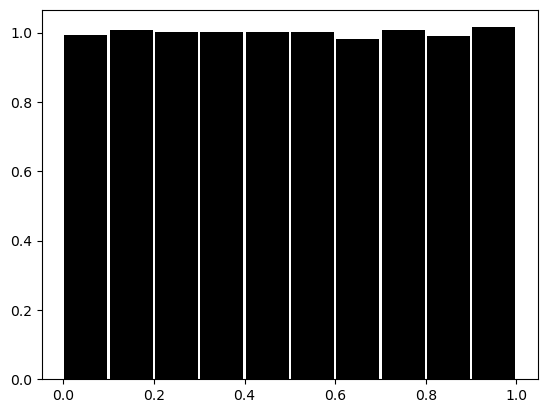

In [1]:
# import packages for basic math, plotting, linear algebra, etc.
from numpy import *
from numpy.linalg import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.special import binom, erf, erfc

# Histogram Class
class histogram():
    def __init__(self,limits,binwidth): # initialization variables
        self.limits = limits
        self.binwidth = binwidth
        self.vals = arange(self.limits[0] + self.binwidth / 2, self.limits[1], self.binwidth) # calculate x position on bar plot
        self.histo = 0 * self.vals # track number of data points in each bins
        self.N_samples = 0
        self.mean = 0
        self.mean_square = 0
        self.std_dev = 0
        self.err_of_mean = 0
        self.histo_err = 0

    def add_sample(self,dat): # adds samples
        self.N_samples += 1
        if dat > self.limits[0] and dat < self.limits[1]:
            bin_index = int((dat - self.limits[0]) / self.binwidth) # index which bin datapoint falls into
            self.histo[bin_index] += 1 # add point in corresponding bin

    def normalize(self): # normalize data into density plot
        self.histo = self.histo / (self.N_samples * self.binwidth)

    def barplot(self): # plot bar plot with matplotlib
        bar(self.vals, self.histo, width=0.95 * self.binwidth, color='k')

    def compute_mean(self):
        self.mean = sum(self.vals * self.histo * self.binwidth)

    def compute_mean_square(self):
        self.mean_square = sum((self.vals ** 2) * self.histo * self.binwidth)

    def compute_std_dev(self):
        self.compute_mean()
        self.compute_mean_square()
        self.std_dev = sqrt(self.mean_square - (self.mean ** 2))

    def compute_error_of_mean(self):
        self.compute_std_dev()
        self.err_of_mean = sqrt(self.std_dev / self.N_samples)

    def compute_histogram_error(self): 
        self.histo_err = sqrt(self.histo * (1 - self.histo * self.binwidth) / (self.N_samples * self.binwidth))

    def plot_error_bars(self):
        self.compute_histogram_error()
        errorbar(self.vals, self.histo, 2 * self.histo_err, fmt='None', capsize=3)


h = histogram(limits=[0,1],binwidth=0.1)

N_samples = 100000
for sample in range(N_samples):
    dat = rand()
    h.add_sample(dat)

h.normalize()
clf()
h.barplot()
print(h.histo)

## (ii)

In [2]:
h.compute_mean()
print(h.mean)

0.5003390000000001


## (iii)

In [3]:
h.compute_mean_square()
print(h.mean_square)

h.compute_std_dev()
print(h.std_dev)

0.33296200000000015
0.28744196819358175


## (iv) - (vi)

In [4]:
means = []
mean_squares = []
std_devs = []
mean_errs = []
Ns = [100, 1000, 10000, 100000, 1000000]


for N in Ns:
    h = histogram(limits=[0,1],binwidth=0.1)
    for sample in range(N):
        dat = rand()
        h.add_sample(dat)
    h.normalize()
    h.compute_mean()
    h.compute_mean_square()
    h.compute_std_dev()
    h.compute_error_of_mean()
    means.append(h.mean)
    mean_squares.append(h.mean_square)
    std_devs.append(h.std_dev)
    mean_errs.append(h.err_of_mean)

print(means)
print(mean_squares)
print(std_devs)
print(mean_errs)

[0.4770000000000001, 0.49870000000000014, 0.49861000000000016, 0.4988550000000001, 0.49996870000000015]
[0.29950000000000015, 0.3324800000000001, 0.33107800000000015, 0.33122980000000013, 0.33236142000000013]
[0.26827411354806496, 0.289444830667262, 0.28716905804769427, 0.2870078204073889, 0.28704131936066274]
[0.05179518448157753, 0.017013078224332658, 0.005358815709162746, 0.001694130515655122, 0.0005357623721022808]


| $N$ | $\langle x \rangle$ | $\langle x^2 \rangle$ | $\delta \langle x^2 \rangle$ | $\epsilon^{\text{mean}}$ |
| --- | --- | --- | --- | --- |
| 100 | 0.4770000 | 0.2995000 | 0.2682741 | 0.0517952 |
| 1000 | 0.4987000 | 0.3324800 | 0.2894448 | 0.0170131 |
| 10000 | 0.4986100 | 0.3310780 | 0.2871691 | 0.0053588 |
| 100000 | 0.4988550 | 0.3312298 | 0.2870078 | 0.0016941 |
| 1000000 | 0.4999687 | 0.3323614 | 0.2870413 | 0.0005358 |

In [5]:
table = "| $N$ | $\\langle x \\rangle$ | $\\langle x^2 \\rangle$ | $\\delta \\langle x^2 \\rangle$ | $\\epsilon^{\\text{mean}}$ |\n"
table += "| --- | --- | --- | --- | --- |\n"

for n, mean, msq, std, err in zip(Ns, means, mean_squares, std_devs, mean_errs):
    table += f"| {n} | {mean:.7f} | {msq:.7f} | {std:.7f} | {err:.7f} |\n"

print(table)

| $N$ | $\langle x \rangle$ | $\langle x^2 \rangle$ | $\delta \langle x^2 \rangle$ | $\epsilon^{\text{mean}}$ |
| --- | --- | --- | --- | --- |
| 100 | 0.4770000 | 0.2995000 | 0.2682741 | 0.0517952 |
| 1000 | 0.4987000 | 0.3324800 | 0.2894448 | 0.0170131 |
| 10000 | 0.4986100 | 0.3310780 | 0.2871691 | 0.0053588 |
| 100000 | 0.4988550 | 0.3312298 | 0.2870078 | 0.0016941 |
| 1000000 | 0.4999687 | 0.3323614 | 0.2870413 | 0.0005358 |



## (vi) - (viii)

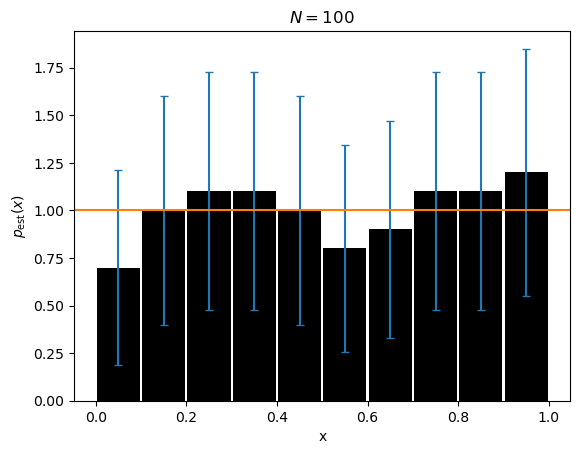

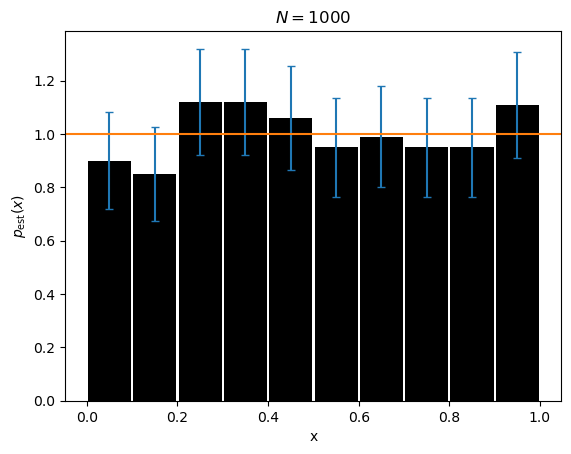

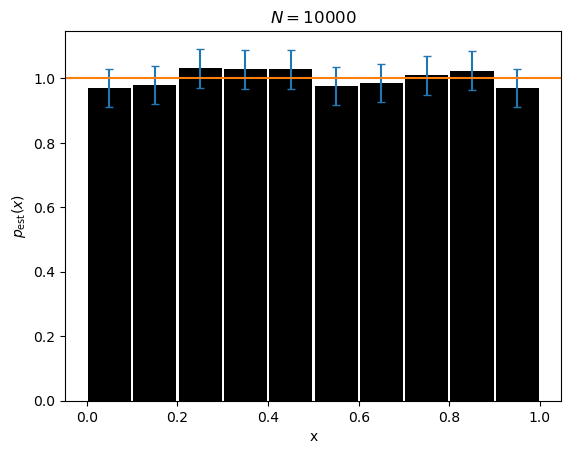

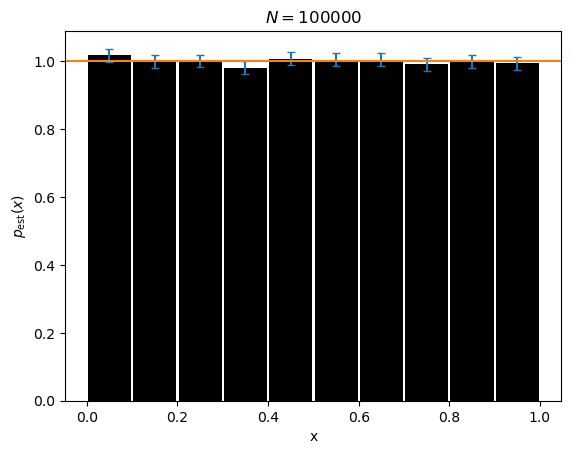

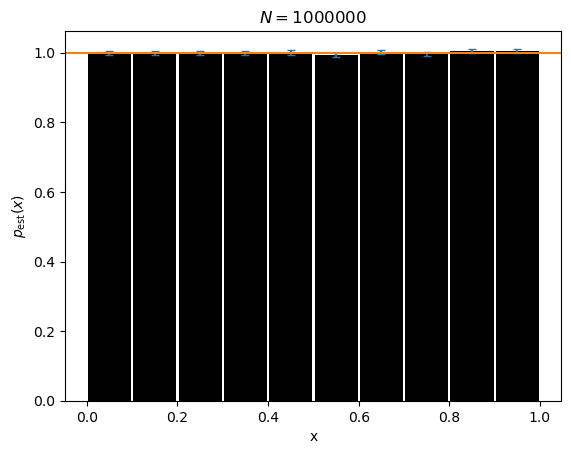

In [6]:
Ns = [100, 1000, 10000, 100000, 1000000]

colors = rcParams['axes.prop_cycle'].by_key()['color']

for index, N in enumerate(Ns):
    h = histogram(limits=[0,1],binwidth=0.1)
    for sample in range(N):
        dat = rand()
        h.add_sample(dat)
    fig, ax = subplots()
    h.normalize()
    h.barplot()
    h.plot_error_bars()
    axhline(y=1, color=colors[1], linestyle='-')
    xlabel("x")
    ylabel("$p_{\\text{est}}(x)$")
    title(f'$N = ${N}')
    savefig(f'Visualizations/1_viii_{index}.png')


Yes, larger visible variance in the histogram plots results in significantly larger bars. 

## (ix)

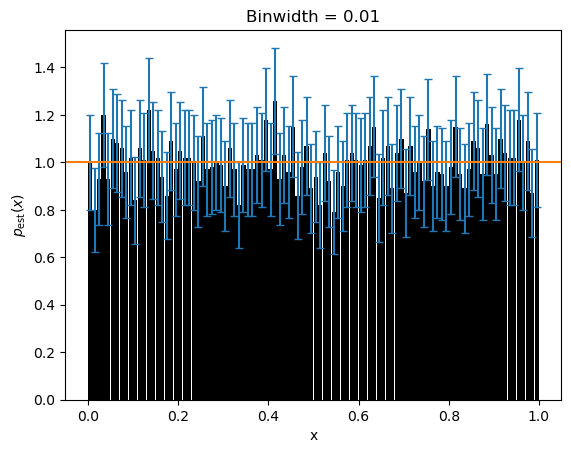

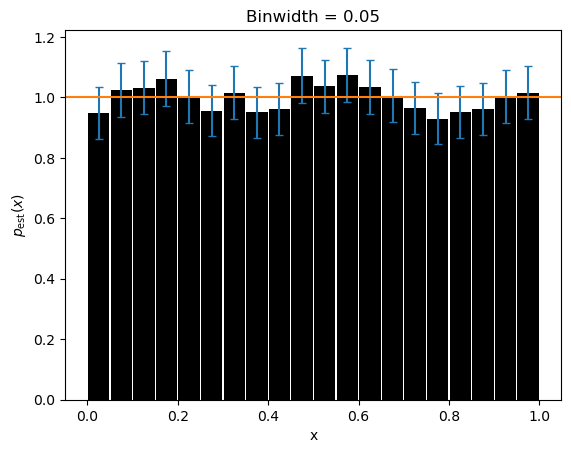

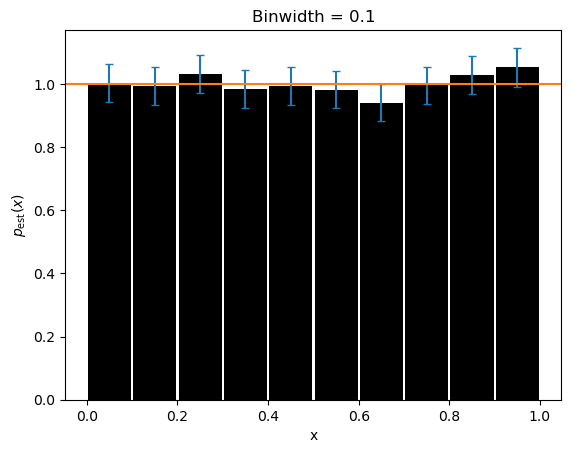

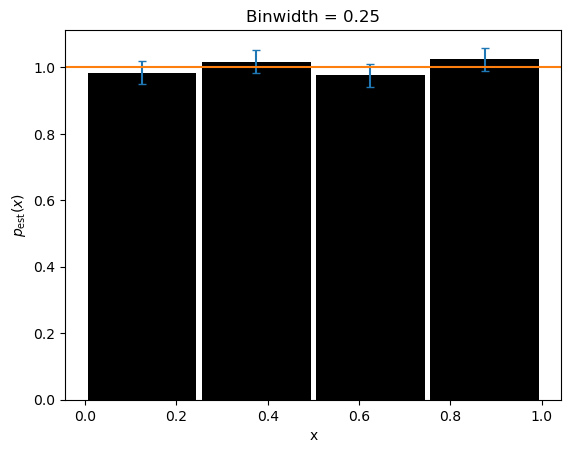

In [7]:
binwidths = [0.01, 0.05, 0.1, 0.25]

N = 10000
for index, binwidth in enumerate(binwidths):
    h = histogram(limits=[0,1], binwidth=binwidth)
    for sample in range(N):
        dat = rand()
        h.add_sample(dat)
    fig, ax = subplots()
    h.normalize()
    h.barplot()
    h.plot_error_bars()
    axhline(y=1, color=colors[1], linestyle='-')
    xlabel("x")
    ylabel("$p_{\\text{est}}(x)$")
    title(f'Binwidth = {binwidth}')
    savefig(f'Visualizations/1_ix_{index}.png')
    

Larger binwidth not only resuces the number of caluclations but also reduces the estimated error of each bin calculation. 

## (x)

Using a wider bin will sacrifice resolution of a histogram, which may be crucial to identify patterns in a nonuniform distribution. The easiest way to determine a good $\Delta x$ would be do plot with different values of $\Delta x$ and determine the best one. I would try plotting the histogram with a seaborn.kdeplot and try to find a binwidth that is reasonably smooth but maintains important distribution patterns. 

# Question 2

## (i)

In [8]:
x = 0.5
max_hop_length = 0.5 
n_steps = 1000
x_trajectory = zeros(n_steps)
for step in range(n_steps): # loop through every hop
    x_trial = x + max_hop_length * (rand() - 0.5) # new x after trial step, trial step range [-0.25, 0.25]
    if x_trial >= 0 and x_trial <= 1: # Metropolis acceptance rule with bounds [0, 1] 
        x = x_trial # update new position if obeying Metropolis rule
    x_trajectory[step] = x # update trajectory

## (ii)

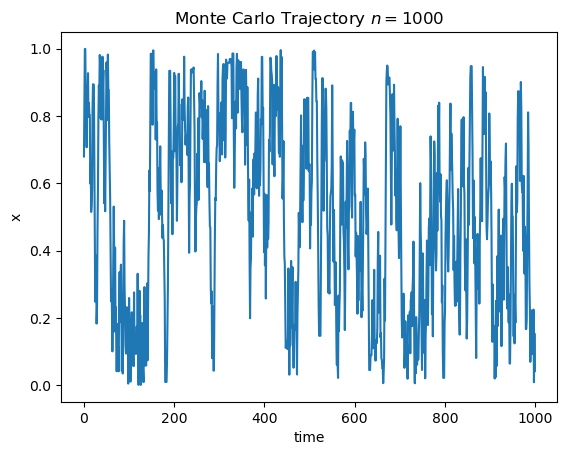

In [9]:
fig, ax = subplots()
plot(range(n_steps), x_trajectory)
ax.set_xlabel('time')
ax.set_ylabel('x')
ax.set_title(f'Monte Carlo Trajectory $n = {n_steps}$')
savefig('Visualizations/2_ii.png')

## (iii)

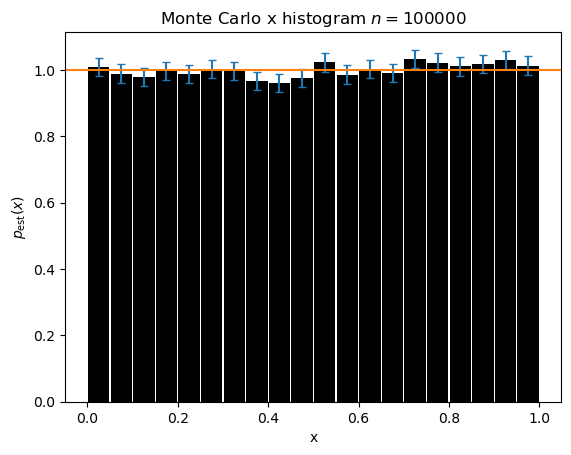

In [10]:
x = 0.5
max_hop_length = 0.5 
n_steps = 100000
x_trajectory = zeros(n_steps)
for step in range(n_steps): 
    x_trial = x + max_hop_length * (rand() - 0.5) 
    if x_trial >= 0 and x_trial <= 1: 
        x = x_trial 
    x_trajectory[step] = x


h = histogram(limits=[0,1],binwidth=0.05)
for step in x_trajectory:
    h.add_sample(step)

h.normalize()
h.barplot()
h.plot_error_bars()
axhline(y=1, color=colors[1], linestyle='-')
xlabel("x")
ylabel("$p_{\\text{est}}(x)$")
title(f'Monte Carlo x histogram $n = {n_steps}$')
savefig(f'Visualizations/2_iii.png')


## (iv)

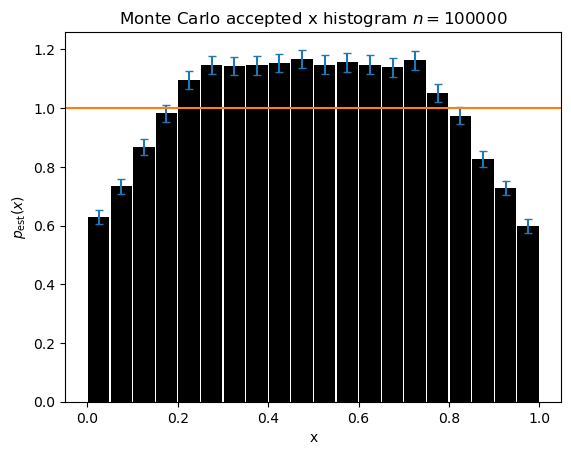

In [11]:
x = 0.5
max_hop_length = 0.5 
n_steps = 100000
x_trajectory = []
for step in range(n_steps): 
    x_trial = x + max_hop_length * (rand() - 0.5) 
    if x_trial >= 0 and x_trial <= 1: 
        x = x_trial 
        x_trajectory.append(x)


h = histogram(limits=[0,1],binwidth=0.05)
for step in x_trajectory:
    h.add_sample(step)

h.normalize()
h.barplot()
h.plot_error_bars()
axhline(y=1, color=colors[1], linestyle='-')
xlabel("x")
ylabel("$p_{\\text{est}}(x)$")
title(f'Monte Carlo accepted x histogram $n = {n_steps}$')
savefig(f'Visualizations/2_iv.png')


The trajectory favors being near the center of the allowed range of x values. This makes sense, as neglecting the rejected moves makes the position appear to stall near the center until a valid move is accepted. 